In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from plotting_tools import * 

In [2]:
experiment_series ="pop8"
subsetting_1a = "decay"
subsetting_1b = "no_decay"
subsetting_1c = "no_decay"

subsetting_2a = "Rain"
subsetting_2b = "Rain"
subsetting_2c = "noRain"

result_path = f"../../preprocessing/preprocessed_data/{experiment_series}"

In [3]:
dfa = pd.read_csv(f"{result_path}/substances/{subsetting_1a}_{subsetting_2a}_output.csv")
dfb = pd.read_csv(f"{result_path}/substances/{subsetting_1b}_{subsetting_2b}_output.csv")
dfc = pd.read_csv(f"{result_path}/substances/{subsetting_1c}_{subsetting_2c}_output.csv")

In [4]:
# Load the data
def load_simulations(memilio_id, result_path, subsetting_1, subsetting_2):
    df = pd.read_csv(f"{result_path}/substances/{subsetting_1}_{subsetting_2}_output.csv")
    df = df.loc[df.simulation_id == memilio_id].drop(columns=["simulation_id"])
    df["Date"] = pd.to_datetime(start_date) + pd.to_timedelta(df["time_in_minutes"], unit="min")
    return df

def load_measurements():
    df_measurements = pd.read_csv(f"../../preprocessing/preprocessed_data/concentration_measurements.csv")
    df_measurements.Location = df_measurements.Location.replace({'Langrieder \nBach': "Am Langwieder Bach",
                                    'Gräfelfinger Str. \n/Waldwiesenstr.': "Gräfelfinger Str.",
                                    "Schmidbartlanger ": "Schmidbartlanger", 
                                    "Savitsstr.": "Savitstr.", 
                                    "Gyßling Becken": "Gyßlinger Becken"})

    df_measurements["Below_threshold"] = False
    df_measurements.loc[df_measurements.Value=="<75", "Below_threshold"] = True
    df_measurements.loc[df_measurements.Value=="<75", "Value"] = 75/2
    df_measurements.Value = df_measurements.Value.astype(float)
    df_measurements.Date = pd.to_datetime(df_measurements.Date)
    return df_measurements

In [5]:
#df_1 = load_simulations(2, result_path, subsetting_1a, subsetting_2a) # smaller values
#df_2 = load_simulations(2, result_path, subsetting_1b, subsetting_2b)

df_measurements = load_measurements()

In [6]:
memilio_id = 1

df_1 = dfa.loc[dfa.simulation_id == memilio_id].drop(columns=["simulation_id"])
df_1["Date"] = pd.to_datetime(start_date) + pd.to_timedelta(df_1["time_in_minutes"], unit="min")

df_2 = dfb.loc[dfb.simulation_id == memilio_id].drop(columns=["simulation_id"])
df_2["Date"] = pd.to_datetime(start_date) + pd.to_timedelta(df_2["time_in_minutes"], unit="min")

df_3 = dfc.loc[dfc.simulation_id == memilio_id].drop(columns=["simulation_id"])
df_3["Date"] = pd.to_datetime(start_date) + pd.to_timedelta(df_3["time_in_minutes"], unit="min")

In [ ]:
c_rain_decay = "#74a1a3"
c_rain_no_decay = "#1c4587"
c_norain_no_decay = "#996633"
measurement_points = "#980000"

/tmp/ipykernel_10776/4067352590.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df["location"] = covid_df["manhole"].map(manhole_names)
/tmp/ipykernel_10776/4067352590.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df["location"] = covid_df["manhole"].map(manhole_names)
/tmp/ipykernel_10776/4067352590.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

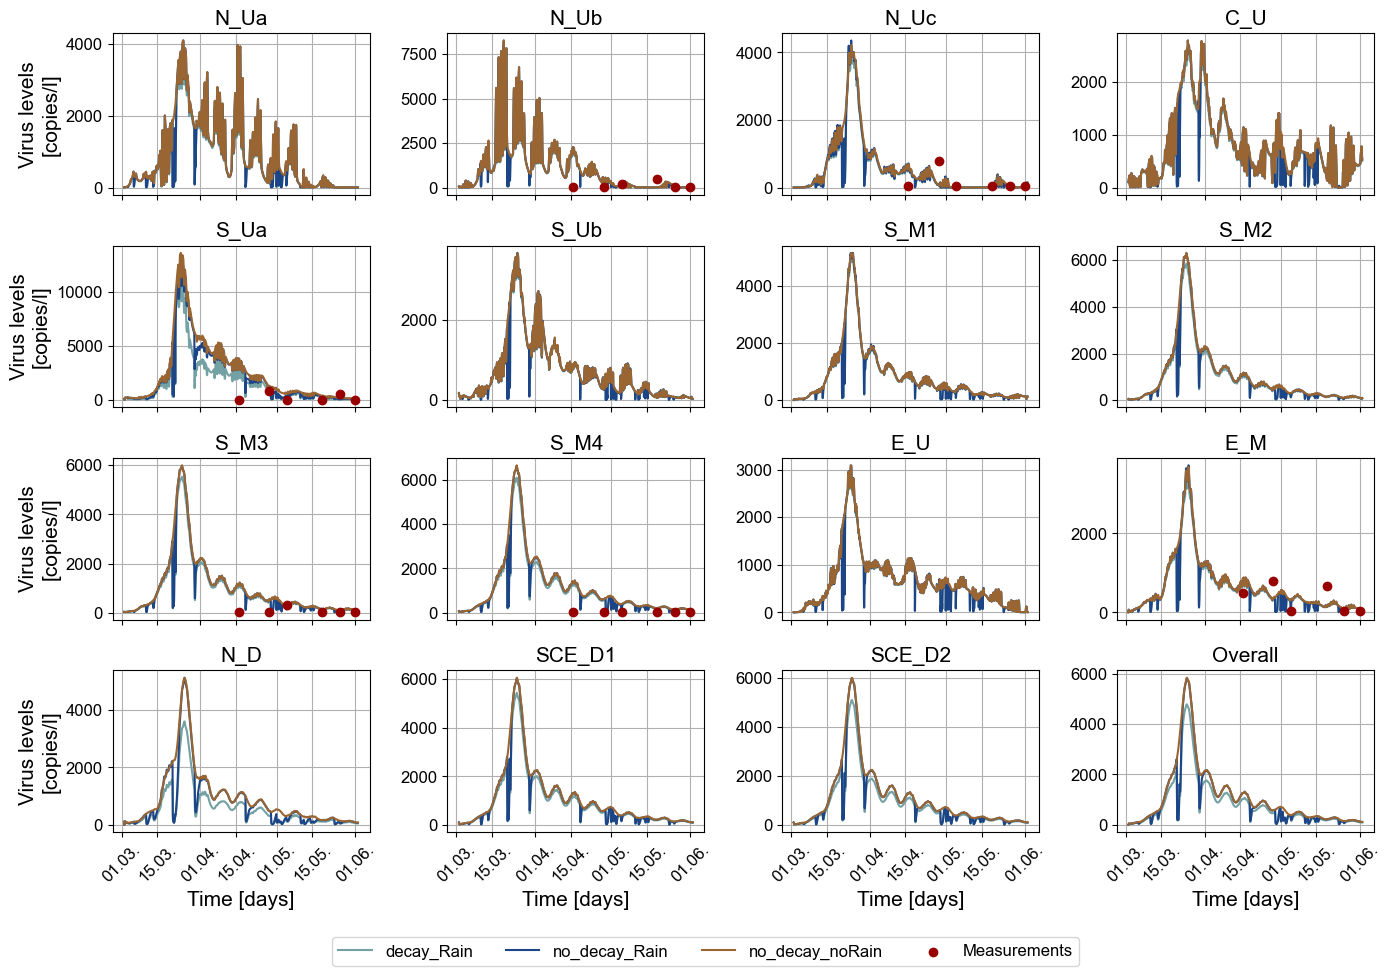

In [27]:
# Sort locations for consistency
locations_sorted = manhole_names.values()

# Set up 4x2 subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18*cm, 12*cm), sharex=True)
axes = axes.flatten()

# first df
covid_df = df_1[(df_1["variable"] == "COV19") & (df_1["manhole"].isin(manhole_names.keys()))]
covid_df["location"] = covid_df["manhole"].map(manhole_names)
for i, location in enumerate(locations_sorted, start=0):    
    ax = axes[i]

    group = covid_df[covid_df["location"] == location]
    measurements = df_measurements[df_measurements["Location"] == location]
    ax.plot(group["Date"], group["value"], color=c_rain_decay)

# third df
covid_df = df_2[(df_2["variable"] == "COV19") & (df_2["manhole"].isin(manhole_names.keys()))]
covid_df["location"] = covid_df["manhole"].map(manhole_names)
for i, location in enumerate(locations_sorted, start=0):    
    ax = axes[i]

    group = covid_df[covid_df["location"] == location]
    measurements = df_measurements[df_measurements["Location"] == location]
    ax.plot(group["Date"], group["value"], color=c_rain_no_decay)


# second df + plot settings + measurements
covid_df = df_3[(df_3["variable"] == "COV19") & (df_3["manhole"].isin(manhole_names.keys()))]
covid_df["location"] = covid_df["manhole"].map(manhole_names)
for i, location in enumerate(locations_sorted, start=0):    
    ax = axes[i]
    ax.grid(True)

    group = covid_df[covid_df["location"] == location]
    measurements = df_measurements[df_measurements["Location"] == location]
    ax.plot(group["Date"], group["value"], color=c_norain_no_decay)

    #ax.scatter(measurements.loc[measurements.Below_threshold,["Date"]], measurements.loc[measurements.Below_threshold,"Value"], color="grey", zorder=10)
    ax.scatter(measurements.loc[~measurements.Below_threshold,["Date"]], measurements.loc[~measurements.Below_threshold,"Value"], color=measurement_points, zorder=10, label="Measurements")

    ax.set_title(location)
    if i%4 == 0:
        ax.set_ylabel("Virus levels\n[copies/l]")
    else:
        ax.set_ylabel("")

# Set x-labels for bottom row only
for ax in axes[-4:]:
    ax.set_xlabel("Time [days]")
    
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d.%m."))  # Format without year

# Add overall title
plt.tight_layout()
plt.legend([f"{subsetting_1a}_{subsetting_2a}", f"{subsetting_1b}_{subsetting_2b}", f"{subsetting_1c}_{subsetting_2c}", "Measurements"], loc='upper center', bbox_to_anchor=(-1.6, -0.6), ncol=4)
plt.show()


/tmp/ipykernel_10776/4173646020.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df["location"] = covid_df["manhole"].map(manhole_names)
/tmp/ipykernel_10776/4173646020.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df["location"] = covid_df["manhole"].map(manhole_names)
/tmp/ipykernel_10776/4173646020.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

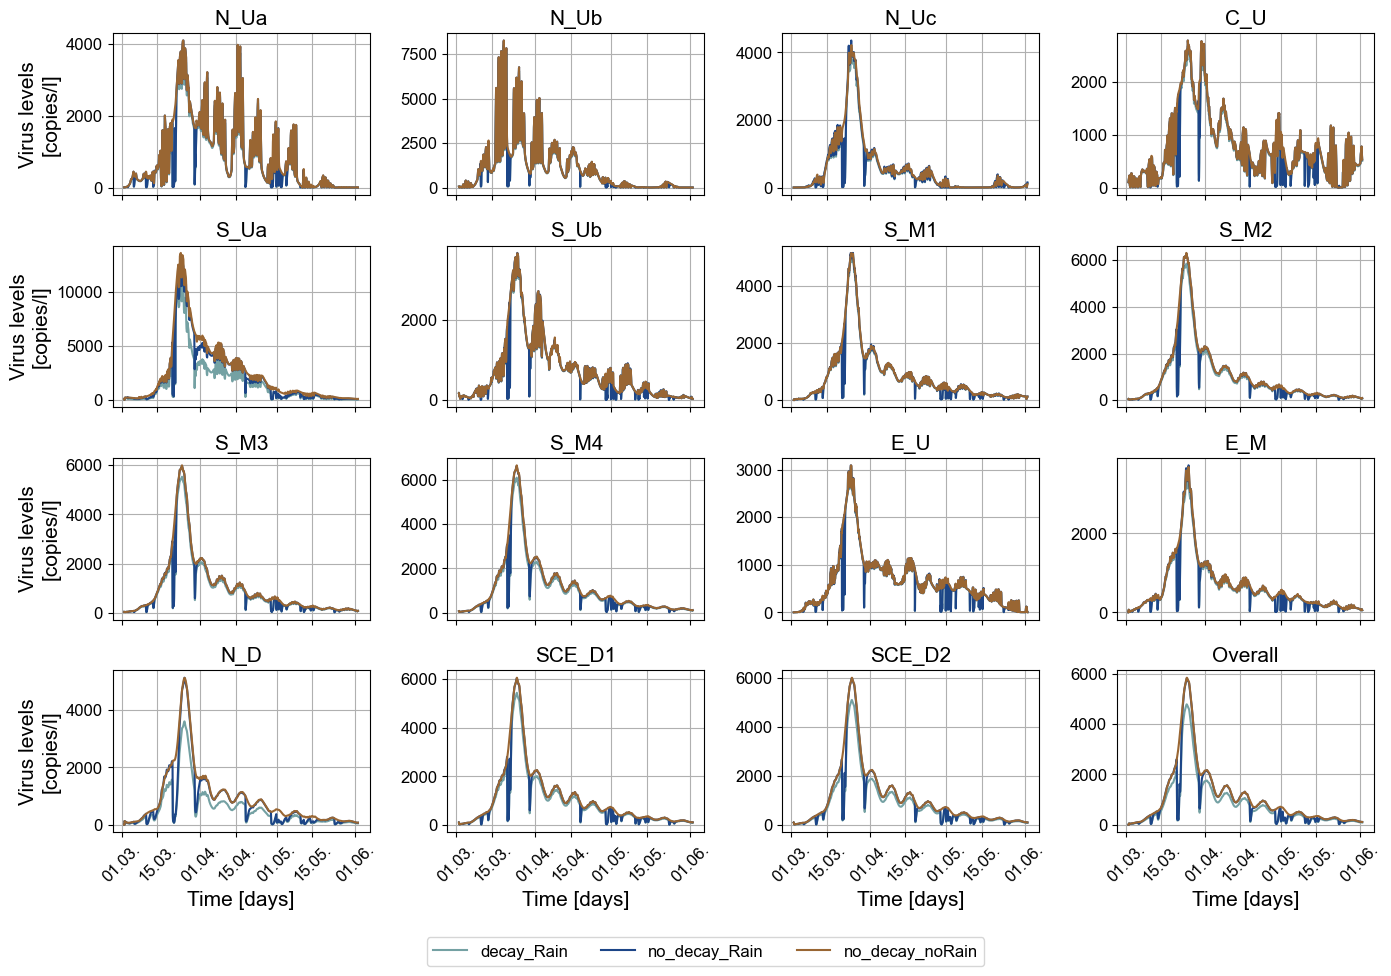

In [25]:
# Sort locations for consistency
locations_sorted = manhole_names.values()

# Set up 4x2 subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18*cm, 12*cm), sharex=True)
axes = axes.flatten()

# first df
covid_df = df_1[(df_1["variable"] == "COV19") & (df_1["manhole"].isin(manhole_names.keys()))]
covid_df["location"] = covid_df["manhole"].map(manhole_names)
for i, location in enumerate(locations_sorted, start=0):    
    ax = axes[i]

    group = covid_df[covid_df["location"] == location]
    measurements = df_measurements[df_measurements["Location"] == location]
    ax.plot(group["Date"], group["value"], color=c_rain_decay)

# third df
covid_df = df_2[(df_2["variable"] == "COV19") & (df_2["manhole"].isin(manhole_names.keys()))]
covid_df["location"] = covid_df["manhole"].map(manhole_names)
for i, location in enumerate(locations_sorted, start=0):    
    ax = axes[i]

    group = covid_df[covid_df["location"] == location]
    measurements = df_measurements[df_measurements["Location"] == location]
    ax.plot(group["Date"], group["value"], color=c_rain_no_decay)


# second df + plot settings + measurements
covid_df = df_3[(df_3["variable"] == "COV19") & (df_3["manhole"].isin(manhole_names.keys()))]
covid_df["location"] = covid_df["manhole"].map(manhole_names)
for i, location in enumerate(locations_sorted, start=0):    
    ax = axes[i]
    ax.grid(True)

    group = covid_df[covid_df["location"] == location]
    measurements = df_measurements[df_measurements["Location"] == location]
    ax.plot(group["Date"], group["value"], color=c_norain_no_decay)

    #ax.scatter(measurements.loc[measurements.Below_threshold,["Date"]], measurements.loc[measurements.Below_threshold,"Value"], color="grey", zorder=10)
    #ax.scatter(measurements.loc[~measurements.Below_threshold,["Date"]], measurements.loc[~measurements.Below_threshold,"Value"], color=measurement_points, zorder=10, label="Measurements")

    ax.set_title(location)
    if i%4 == 0:
        ax.set_ylabel("Virus levels\n[copies/l]")
    else:
        ax.set_ylabel("")

# Set x-labels for bottom row only
for ax in axes[-4:]:
    ax.set_xlabel("Time [days]")
    
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d.%m."))  # Format without year

# Add overall title
plt.tight_layout()
plt.legend([f"{subsetting_1a}_{subsetting_2a}", f"{subsetting_1b}_{subsetting_2b}", f"{subsetting_1c}_{subsetting_2c}"], loc='upper center', bbox_to_anchor=(-1.6, -0.6), ncol=4)
plt.show()


/tmp/ipykernel_13309/3948611957.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df["location"] = covid_df["manhole"].map(manhole_names)
/tmp/ipykernel_13309/3948611957.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df["location"] = covid_df["manhole"].map(manhole_names)
/tmp/ipykernel_13309/3948611957.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

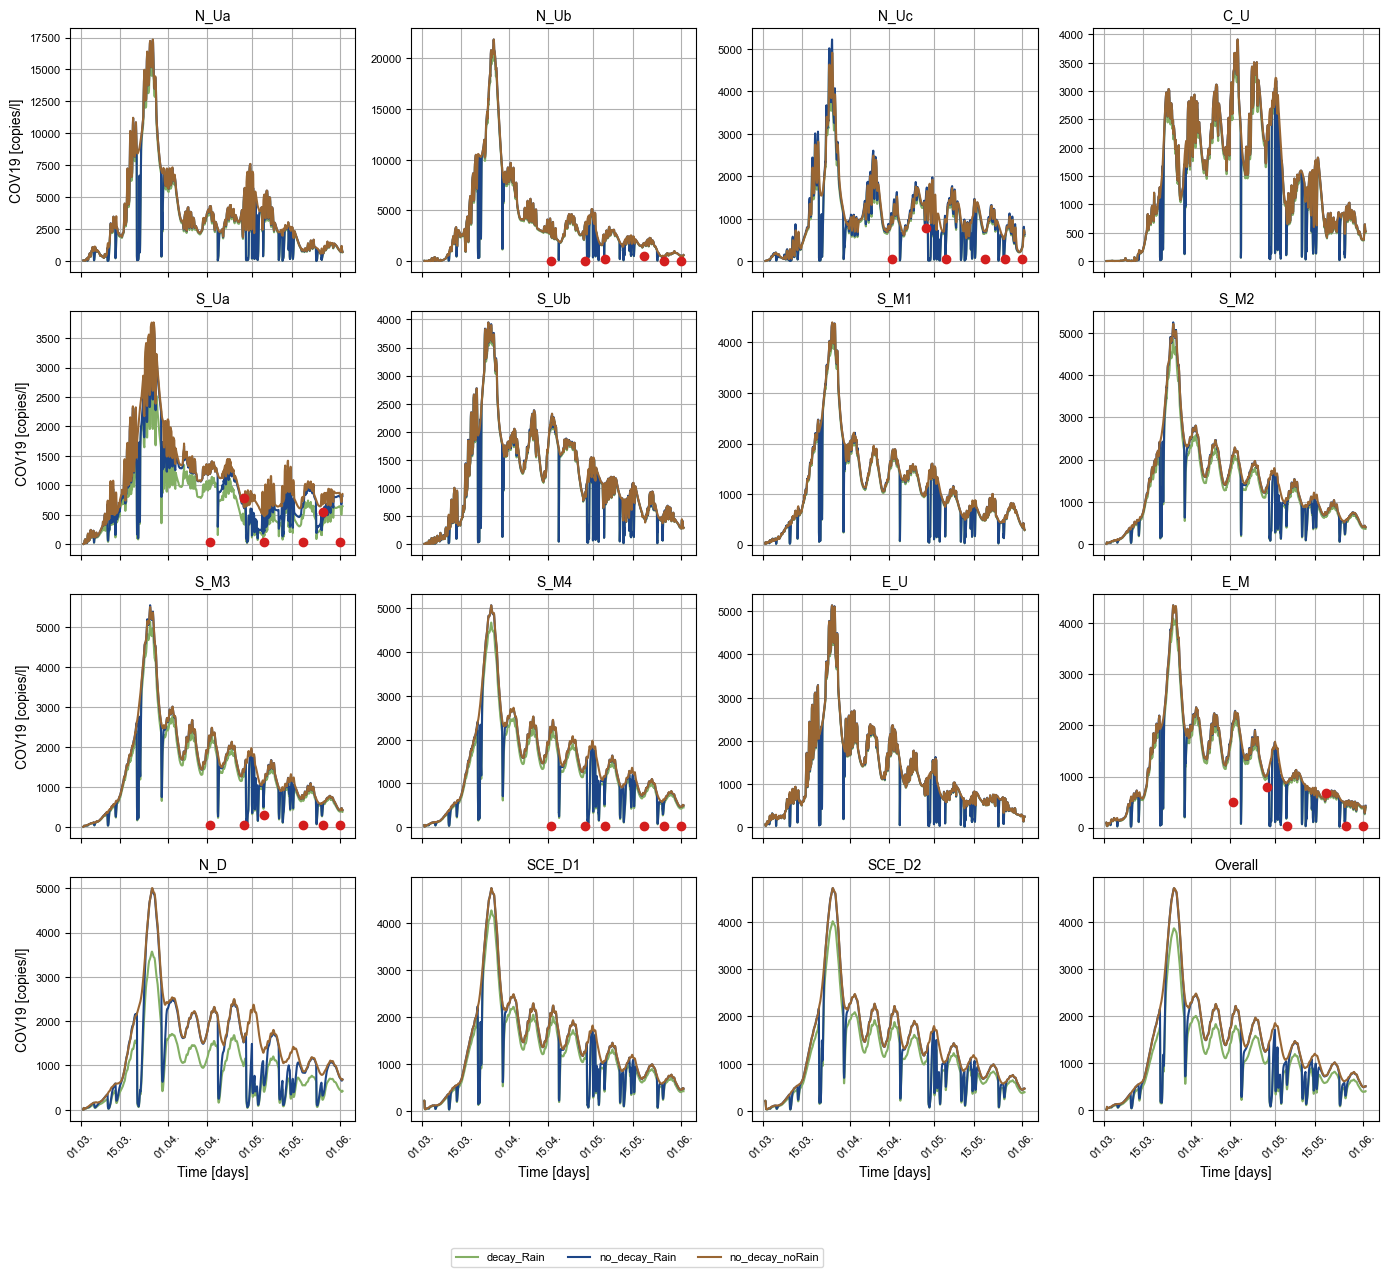

In [17]:
# Sort locations for consistency
locations_sorted = manhole_names.values()

# Set up 4x2 subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(14, 12), sharex=True)
axes = axes.flatten()

# first df
covid_df = df_1[(df_1["variable"] == "COV19") & (df_1["manhole"].isin(manhole_names.keys()))]
covid_df["location"] = covid_df["manhole"].map(manhole_names)
for i, location in enumerate(locations_sorted, start=0):    
    ax = axes[i]

    group = covid_df[covid_df["location"] == location]
    measurements = df_measurements[df_measurements["Location"] == location]
    ax.plot(group["Date"], group["value"], color=c_rain_decay)

# third df
covid_df = df_2[(df_2["variable"] == "COV19") & (df_2["manhole"].isin(manhole_names.keys()))]
covid_df["location"] = covid_df["manhole"].map(manhole_names)
for i, location in enumerate(locations_sorted, start=0):    
    ax = axes[i]

    group = covid_df[covid_df["location"] == location]
    measurements = df_measurements[df_measurements["Location"] == location]
    ax.plot(group["Date"], group["value"], color=c_rain_no_decay)


# second df + plot settings + measurements
covid_df = df_3[(df_3["variable"] == "COV19") & (df_3["manhole"].isin(manhole_names.keys()))]
covid_df["location"] = covid_df["manhole"].map(manhole_names)
for i, location in enumerate(locations_sorted, start=0):    
    ax = axes[i]
    ax.grid(True)

    group = covid_df[covid_df["location"] == location]
    measurements = df_measurements[df_measurements["Location"] == location]
    ax.plot(group["Date"], group["value"], color=c_norain_no_decay)

    ax.scatter(measurements.loc[measurements.Below_threshold,["Date"]], measurements.loc[measurements.Below_threshold,"Value"], color="grey", zorder=10)
    ax.scatter(measurements.loc[~measurements.Below_threshold,["Date"]], measurements.loc[~measurements.Below_threshold,"Value"], color=measurement_points, zorder=10)

    ax.set_title(location)
    if i%4 == 0:
        ax.set_ylabel("COV19 [copies/l]")
    else:
        ax.set_ylabel("")

# Set x-labels for bottom row only
for ax in axes[-4:]:
    ax.set_xlabel("Time [days]")
    
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d.%m."))  # Format without year

# Add overall title
plt.tight_layout()
plt.legend([f"{subsetting_1a}_{subsetting_2a}", f"{subsetting_1b}_{subsetting_2b}", f"{subsetting_1c}_{subsetting_2c}"], loc='upper center', bbox_to_anchor=(-1.6, -0.5), ncol=3)
plt.show()


In [110]:
# *31.773129

/tmp/ipykernel_133374/2099703894.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df["location"] = covid_df["manhole"].map(manhole_names)
/tmp/ipykernel_133374/2099703894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df["location"] = covid_df["manhole"].map(manhole_names)


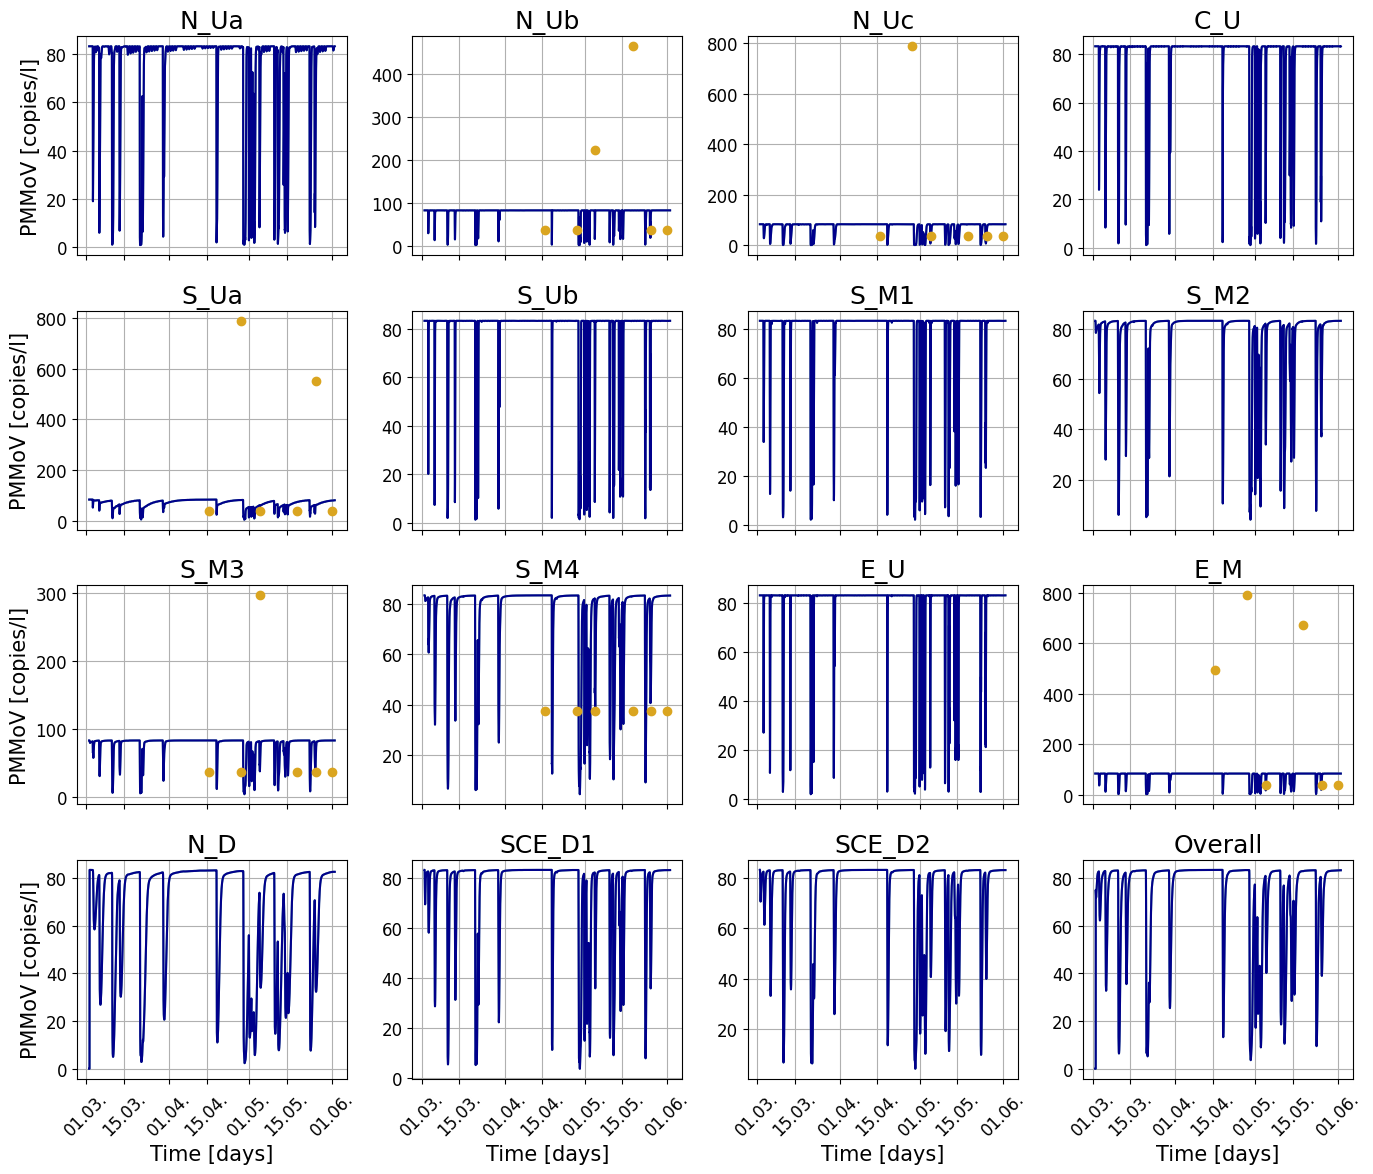

In [23]:
# Sort locations for consistency
locations_sorted = manhole_names.values()

# Set up 4x2 subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(14, 12), sharex=True)
axes = axes.flatten()

# first df
covid_df = df_1[(df_1["variable"] == "PMMoV") & (df_1["manhole"].isin(manhole_names.keys()))]
covid_df["location"] = covid_df["manhole"].map(manhole_names)
for i, location in enumerate(locations_sorted, start=0):    
    ax = axes[i]

    group = covid_df[covid_df["location"] == location]
    measurements = df_measurements[df_measurements["Location"] == location]
    ax.plot(group["Date"], group["value"], color="cadetblue")

# second df + plot settings + measurements
covid_df = df_2[(df_2["variable"] == "PMMoV") & (df_2["manhole"].isin(manhole_names.keys()))]
covid_df["location"] = covid_df["manhole"].map(manhole_names)
for i, location in enumerate(locations_sorted, start=0):    
    ax = axes[i]
    ax.grid(True)

    group = covid_df[covid_df["location"] == location]
    measurements = df_measurements[df_measurements["Location"] == location]
    ax.plot(group["Date"], group["value"], color="darkblue")

    ax.scatter(measurements.loc[measurements.Below_threshold,["Date"]], measurements.loc[measurements.Below_threshold,"Value"], color="grey", zorder=10)
    ax.scatter(measurements.loc[~measurements.Below_threshold,["Date"]], measurements.loc[~measurements.Below_threshold,"Value"], color="goldenrod", zorder=10)

    ax.set_title(location)
    if i%4 == 0:
        ax.set_ylabel("PMMoV [copies/l]")
    else:
        ax.set_ylabel("")

# Set x-labels for bottom row only
for ax in axes[-4:]:
    ax.set_xlabel("Time [days]")
    
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d.%m."))  # Format without year

# Add overall title
plt.tight_layout()
plt.show()
